### Filter hand-picked samples

In [1]:
import os

# Define the path to the folder containing the audio files
folder_path = "/home/th716/evaluation_study_app/models/spotify_sleep_dataset/ra_ssd_2048_128/model_step_90000/samples/audio/sch_ddpm_nisteps_1000"

files_to_keep = {12, 14, 21, 23, 24, 25, 26, 29, 33, 36, 40, 42, 49, 53, 54, 59, 70, 72, 76, 83, 94, 97, 103, 113}

for filename in os.listdir(folder_path):
    if filename.startswith("audio_") and filename.endswith(".wav"):
        try:
            file_number = int(filename.split('_')[1].split('.')[0])
            if file_number not in files_to_keep:
                os.remove(os.path.join(folder_path, filename))
                print(f"Deleted {filename}")
        except ValueError:
            print(f"Skipping non-standard file {filename}")


Deleted audio_435.wav
Deleted audio_847.wav
Deleted audio_392.wav
Deleted audio_896.wav
Deleted audio_343.wav
Deleted audio_722.wav
Deleted audio_1016.wav
Deleted audio_449.wav
Deleted audio_498.wav
Deleted audio_267.wav
Deleted audio_2.wav
Deleted audio_606.wav
Deleted audio_31.wav
Deleted audio_170.wav
Deleted audio_963.wav
Deleted audio_511.wav
Deleted audio_788.wav
Deleted audio_1011.wav
Deleted audio_338.wav
Deleted audio_759.wav
Deleted audio_260.wav
Deleted audio_601.wav
Deleted audio_5.wav
Deleted audio_177.wav
Deleted audio_516.wav
Deleted audio_964.wav
Deleted audio_395.wav
Deleted audio_840.wav
Deleted audio_432.wav
Deleted audio_344.wav
Deleted audio_891.wav
Deleted audio_725.wav
Deleted audio_918.wav
Deleted audio_786.wav
Deleted audio_832.wav
Deleted audio_440.wav
Deleted audio_491.wav
Deleted audio_336.wav
Deleted audio_757.wav
Deleted audio_38.wav
Deleted audio_179.wav
Deleted audio_518.wav
Deleted audio_212.wav
Deleted audio_673.wav
Deleted audio_44.wav
Deleted audio_9

In [2]:
import os

# Define the path to the folder containing the audio files
folder_path = "/home/th716/evaluation_study_app/models/spotify_sleep_dataset/ra_ssd_2048_128/model_step_90000/samples/images/sch_ddpm_nisteps_1000"

files_to_keep = {12, 14, 21, 23, 24, 25, 26, 29, 33, 36, 40, 42, 49, 53, 54, 59, 70, 72, 76, 83, 94, 97, 103, 113}

for filename in os.listdir(folder_path):
    if filename.startswith("image_") and filename.endswith(".png"):
        try:
            file_number = int(filename.split('_')[1].split('.')[0])
            if file_number not in files_to_keep:
                os.remove(os.path.join(folder_path, filename))
                print(f"Deleted {filename}")
        except ValueError:
            print(f"Skipping non-standard file {filename}")


Deleted image_899.png
Deleted image_848.png
Deleted image_562.png
Deleted image_910.png
Deleted image_675.png
Deleted image_214.png
Deleted image_751.png
Deleted image_330.png
Deleted image_497.png
Deleted image_32.png
Deleted image_834.png
Deleted image_446.png
Deleted image_780.png
Deleted image_609.png
Deleted image_268.png
Deleted image_756.png
Deleted image_490.png
Deleted image_337.png
Deleted image_35.png
Deleted image_441.png
Deleted image_833.png
Deleted image_787.png
Deleted image_519.png
Deleted image_178.png
Deleted image_98.png
Deleted image_917.png
Deleted image_565.png
Deleted image_104.png
Deleted image_672.png
Deleted image_213.png
Deleted image_758.png
Deleted image_339.png
Deleted image_789.png
Deleted image_965.png
Deleted image_517.png
Deleted image_176.png
Deleted image_600.png
Deleted image_261.png
Deleted image_724.png
Deleted image_345.png
Deleted image_890.png
Deleted image_96.png
Deleted image_47.png
Deleted image_394.png
Deleted image_433.png
Deleted image_8

### Remove audio and image files without a matching counterpart

In [1]:
import os

# Define paths to the audio and image directories
audio_dir = "models/drum_samples/ds_256_256/model_step_40000/samples/audio/pregen_sch_ddpm_nisteps_1000"
image_dir = "models/drum_samples/ds_256_256/model_step_40000/samples/images/pregen_sch_ddpm_nisteps_1000"

# Get list of audio and image files
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Extract the indexes from the filenames (assuming format like 'audio_x.wav' and 'image_x.png')
audio_indexes = set(f.split('_')[1].split('.')[0] for f in audio_files)
image_indexes = set(f.split('_')[1].split('.')[0] for f in image_files)

# Find the common indexes (files that have both audio and image)
common_indexes = audio_indexes.intersection(image_indexes)

# Remove audio files without a matching image
for audio_file in audio_files:
    audio_index = audio_file.split('_')[1].split('.')[0]
    if audio_index not in common_indexes:
        os.remove(os.path.join(audio_dir, audio_file))
        print(f"Removed {audio_file} from audio directory")

# Remove image files without a matching audio
for image_file in image_files:
    image_index = image_file.split('_')[1].split('.')[0]
    if image_index not in common_indexes:
        os.remove(os.path.join(image_dir, image_file))
        print(f"Removed {image_file} from image directory")


### Testing to filter out noisy/improper examples

In [2]:
import librosa
import numpy as np

def analyze_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # RMS
    rms = np.sqrt(np.mean(y**2))
    
    # Energy
    energy = np.sum(y**2)
    
    # Peak-to-Peak
    peak_to_peak = np.max(y) - np.min(y)
    
    # Spectral Features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y))
    
    # Zero-Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Noise detection heuristics
    noise_threshold = 0.01  
    is_noisy = (energy < noise_threshold) or (spectral_flatness > 0.5) or (zero_crossing_rate > 0.1)

    return {
        "loudness": rms,
        "energy": energy,
        "peak_to_peak": peak_to_peak,
        "spectral_centroid": spectral_centroid,
        "spectral_flatness": spectral_flatness,
        "zero_crossing_rate": zero_crossing_rate,
        "is_noisy": is_noisy
    }

Analysis results for models/spotify_sleep_dataset/512_128/model_step_40000/samples/audio/pregen_sch_ddpm_nisteps_1000/audio_6.wav:
Loudness (RMS): 0.004682662896811962
Energy: 2.868446111679077
Peak to Peak: 0.0557587593793869
Spectral Centroid: 830.1635603557794
Spectral Flatness: 0.0011601250153034925
Zero-Crossing Rate: 0.020559310913085938
Is Noisy: False


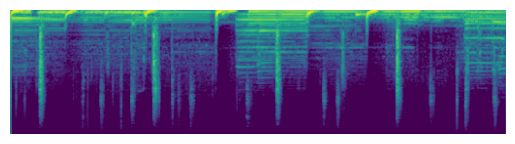

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Audio, display

# Example of using the function
index = 6
audio_file_path = f'models/spotify_sleep_dataset/512_128/model_step_40000/samples/audio/pregen_sch_ddpm_nisteps_1000/audio_{index}.wav'
image_file_path = f'models/spotify_sleep_dataset/512_128/model_step_40000/samples/images/pregen_sch_ddpm_nisteps_1000/image_{index}.png'  # Use the correct image extension

results = analyze_audio(audio_file_path)

print(f"Analysis results for {audio_file_path}:")
print(f"Loudness (RMS): {results['loudness']}")
print(f"Energy: {results['energy']}")
print(f"Peak to Peak: {results['peak_to_peak']}")
print(f"Spectral Centroid: {results['spectral_centroid']}")
print(f"Spectral Flatness: {results['spectral_flatness']}")
print(f"Zero-Crossing Rate: {results['zero_crossing_rate']}")
print(f"Is Noisy: {results['is_noisy']}")

img = mpimg.imread(image_file_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

display(Audio(audio_file_path, autoplay=False))